<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_11_Data_Warehouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Warehouses (Incomplete)
### Brendan Shea, PhD

A **Data Warehouse** is a specific kind of database designed to help people like analysts, data scientists, and decision-makers get answers to complex questions. Unlike a traditional "application" database, which is geared towards handling daily transactions like adding new customer records or updating product prices, a data warehouse is optimized for digging deep into data to reveal patterns or trends. For instance, a data warehouse could help a business figure out whether sales are better in summer or winter, across multiple years and regions.

The key difference between a data warehouse and a traditional application database lies in their primary functions. A traditional database is like the cash register in a store; it's essential for day-to-day operations, keeping track of each transaction as it happens. It's designed to handle lots of quick, simple queries, like checking the price of an item or updating the quantity of a product in stock. Because it's transaction-oriented, it's structured to make these operations as fast and efficient as possible.

In contrast, a data warehouse is more like the store's back office, where managers and analysts look over sales data, inventory levels, and customer feedback to make longer-term decisions. It's structured to handle fewer queries, but these queries are much more complex and pull data from multiple sources. This is why data warehouses often use a different kind of data organization, like denormalization and Star Schema, to make these complex queries faster to run.

## Introduction to the Zombies! Case Study

In this case study, you find yourself in the role of a data scientist at the Center for Disease Control and Prevention (CDC), the national public health agency of the United States. Your mission is urgent and of the highest importance: a Zombie Outbreak has occurred, and it's spreading at an alarming rate. Traditional methods of containment have proven ineffective, and the situation is escalating. The CDC has been tasked with synthesizing data from a myriad of sources to develop a strategy for containment and, ultimately, eradication of this unprecedented threat.

The data you'll be working with comes from diverse origins---hospital records, military intelligence, social media feeds, satellite imagery, and more. Each data source provides a piece of the puzzle, and it's your job to assemble these pieces into a coherent and actionable picture. You'll be using Postgres as your data warehousing solution to integrate these disparate data sets.

In this context, application databases might help hospitals keep track of current patient records and immediate resource allocation. But a data warehouse would help the CDC analyze trends across *many* communities, like how the outbreak is spreading across regions, the effectiveness of various treatments over time, or how different variables like weather or population density affect the rate of infection

The stakes are high. Decisions based on your analyses will directly impact the deployment of resources, from medical supplies to military interventions. Time is of the essence, and the tools at your disposal, including the data warehouse, must be wielded with both speed and precision. This case study will guide you through the key questions and challenges you'll face in this high-pressure scenario, providing you with the technical know-how to navigate the complexities of data warehousing with Postgres in the context of a global emergency.

## Data Sources

Data Warehouses are typically constructed by pulling in data from many other sources, including (but not limited to) other databases. During a Zombie Outbreak, the CDC would likely draw from a diverse array of data sources to form a comprehensive understanding of the situation. These sources would include:

1.  *Hospital Records*  would provide real-time information on the number of infected individuals, their symptoms, and the effectiveness of treatments. This is analogous to Electronic Health Records (EHR) commonly integrated into healthcare data warehouses.

2.  *Military Intelligence* reports from units engaged with zombie containment would offer insights into the effectiveness of various strategies and the spread of the outbreak. In real-world scenarios, defense departments often maintain their own data warehouses for strategic analysis.

3.  To track large-scale movements of zombie hordes, *satellite imagery* would be invaluable. Geospatial data is often included in data warehouses for environmental and defense applications.

4.  Public sentiment and eyewitness accounts could be scraped from *social media platforms* like Twitter or Facebook. Many businesses use social media data for sentiment analysis and market research.

5.  *Traffic Cameras and CCTV* would offer ground-level visual data on zombie movements within cities. In smart cities, traffic and surveillance data are often integrated into a central data warehouse for monitoring and planning.

6.  *Weather conditions* could affect the spread of the outbreak and the effectiveness of interventions. Meteorological data is commonly used in various industries like agriculture and retail for predictive analysis.

7.  Real-time *news updates* would provide another layer of information, especially from regions where other types of data might be scarce. Media data is often used for trend analysis and is integrated into various types of data warehouses.

8.   Data from other *international or governmental organizations* like the WHO could provide a global perspective on the outbreak. In global health research, data from international organizations is often crucial.

9.  Information from *utility companies* on power outages or disruptions in water supply could indicate areas with high zombie activity. Utility data is commonly used in municipal planning and emergency response.

10. *Air Traffic Control* data about the movement of planes could help in understanding if and how the outbreak is spreading internationally. Transportation data, including air traffic, is often integrated into logistics and planning data warehouses.

Each of these data sources would contribute to a multi-dimensional view of the crisis, allowing the CDC to make informed decisions on how best to combat the outbreak.

## Extract, Transform, Load (ETL)

Imagine you're at the helm of the CDC's data operations during a Zombie Outbreak. You have a plethora of data coming in from hospital records, military intelligence, satellite imagery, and more. Each of these data sources has its own format, structure, and level of granularity. Some data might be in real-time, while others might be batch-updated every 24 hours. The challenge now is to harmonize this cacophony of data into a symphony of insights. This is the essence of the ETL process.

**Extract--** The first step is to extract the data from these various sources. Whether it's pulling in a CSV file from a military server, querying a hospital's database, or using an API to get real-time weather conditions, the extraction process is about getting access to the data.

**Transform--** Once you have the raw data, it's rarely in the perfect state for analysis. Maybe the hospital records use one format for dates, while the military intelligence uses another. Perhaps the sentiment data from social media needs to be categorized into positive, neutral, or negative. The transform step is where you clean, enrich, and otherwise prepare the data for its final destination.

**Load--** The last step is to load this now-transformed data into your data warehouse. This is where it will live, ready for querying and analysis as you make life-and-death decisions in combating the zombie apocalypse.

The ETL process is the logistical backbone that enables organizations to draw actionable insights from a sea of disparate data. Without ETL, your data warehouse is like a library without a catalog: full of information, but nearly impossible to use effectively.

To understand how this works, it will be helpful to consider a few examples:

### Example 1: Hospital Records

*Extract--*The first step would involve pulling in data from various hospitals about the number of infected individuals, their symptoms, and the effectiveness of treatments. This could be done through an API that the hospitals expose or by accessing a shared database.

*Transform--*The raw data might have inconsistencies like different units of measurement (e.g., temperature in Fahrenheit or Celsius) or varying formats for patient IDs. The transformation step would standardize these units and formats. It might also categorize symptoms into broader categories like 'mild,' 'moderate,' or 'severe' to make analysis easier.

*Load--*Finally, this cleaned and transformed data would be loaded into the CDC's data warehouse into a table specifically designed for medical records, ready for querying and analysis.

### Example 2: Military Intelligence

*Extract--*Reports from military units engaged with zombie containment would be sent in various formats: text files, PDFs, or even voice recordings. These would first be extracted and converted into a readable format.

*Transform--*The transformation step would involve parsing these different formats into structured data. For example, key information like the number of zombies encountered, the number of soldiers involved, and the geographic coordinates of the engagement would be extracted and standardized.

*Load--*This structured data would then be loaded into a separate table in the data warehouse, designed to store military intelligence. This table might have foreign key relationships with other tables, like geographic locations or time data.

### Example 3: Social Media Sentiment

*Extract--*Public sentiment and eyewitness accounts could be scraped from social media platforms like Twitter or Facebook using their respective APIs.

*Transform--*The raw social media data would likely be unstructured text. Natural Language Processing (NLP) algorithms could be applied to categorize the sentiment of each post as 'positive,' 'negative,' or 'neutral.' Geolocation data could also be extracted to determine the location of each post.

*Load--*This transformed data would be loaded into a table designed to store public sentiment. This could then be joined with other tables in the data warehouse to provide a multi-dimensional view of the public's reaction to the outbreak and the effectiveness of containment measures.

Each of these examples demonstrates how the ETL process takes raw, disparate data and turns it into a structured, queryable form that can provide invaluable insights, especially in a crisis situation like a zombie outbreak.

### Table: Common Issues in ETL
| Common Issues  | Standard Solutions |
| --- | --- |
| **Missing Values-**-For instance, some hospital records might lack temperature readings for patients. | Imputation methods can be used to fill in missing values, such as using the mean, median, or a specific constant. Alternatively, records with missing values can be excluded from certain analyses. |
| **nconsistent Formats--**Military reports might use different date formats like MM-DD-YYYY or YYYY-MM-DD. | Standardize the format during the transformation step, converting all dates to a single, consistent format. |
| **Duplicate Records--**Multiple social media posts might be scraped that are essentially the same, perhaps due to retweets or reposts. | Deduplication methods can be applied to remove or consolidate duplicate records. |
| **Data Type Mismatch--**A column expected to contain integers has some entries stored as text (e.g., 'ten' instead of 10). | Convert all entries to a consistent data type, possibly flagging or removing entries that cannot be converted. |
| **Outliers--**In a dataset of zombie sightings, one entry reports an implausibly large number of zombies. | Outliers can be truncated, transformed, or removed based on the specific requirements of the analysis. |
| **Unstructured Data--**Raw text from social media or PDF reports from military intelligence. | Text parsing and Natural Language Processing (NLP) can be used to extract structured information from unstructured data. |
| **Data Skew--**Most of the data is from one geographic location, making it unrepresentative. | Data balancing techniques can be applied, or the skew can be accounted for in the analysis phase. |
| **Temporal Issues--**Data from different time zones, leading to inconsistencies. | Convert all time data to a standard time zone, usually Coordinated Universal Time (UTC). |

## How to Structure Data Warehouses
As mentioned above, application databases primarily serve to facilitate transactional operations, which are essential for the day-to-day functioning of various applications. For instance, when a user signs up on a website, makes a purchase, or updates their profile, these actions are handled by an application database. The database is optimized for quick, real-time read and write operations. It's structured to efficiently handle a large number of simple queries that insert, update, or delete individual records. The focus is on data integrity and consistency, ensuring that all transactions are processed reliably. Here, **data normalization**  and **transaction (ACID)** support is highly important. In the context of a Zombie outbreak, for example, we might have the following application databases:

1. *Emergency Response System Database--*This database would manage real-time information related to emergency responses, such as the dispatch of medical teams, allocation of medical supplies, and tracking of emergency vehicles.
    - Normalization would be crucial to avoid redundancy and ensure data integrity. For example, if an emergency vehicle is dispatched to multiple locations, normalization would prevent the need to enter the vehicle's details multiple times, reducing the risk of errors.
    - Transactions are vital to ensure that when an emergency team is dispatched, all relevant tables are updated atomically. For instance, if a medical team is sent to a location, the database should simultaneously update the team's status to 'dispatched' and decrement the available medical teams count. Failure in any part of this transaction could lead to incorrect data, such as dispatching the same team twice.

2. *Quarantine Facility Management Database--*This database would manage the occupancy, resource allocation, and status of various quarantine facilities.
    - Normalization would help in efficiently managing resources like beds, medical supplies, and personnel. By keeping these details in separate but linked tables, the database can ensure that any changes to resource availability are consistently reflected across all relevant records.

    - When admitting a new patient to a quarantine facility, multiple tables like 'Available Beds,' 'Patient Records,' and 'Medical Supplies' would need to be updated. Transactions ensure that these updates are atomic, maintaining data consistency. For example, admitting a patient should only be successful if a bed is available and medical supplies are sufficient.

In each of these examples, normalization ensures data integrity and minimizes redundancy, while transactions ensure that all database operations are atomic and consistent, which is crucial for the real-time, high-stakes environment of a Zombie Outbreak.


### Why Warehouses are Different

Data warehouses, on the other hand, are built for a different purpose: they are optimized for analytical processing. Unlike application databases, which are concerned with individual transactions, data warehouses are designed to handle complex queries that may involve aggregating or comparing large sets of data. These queries are often read-heavy and require scanning multiple tables to generate reports, identify trends, or make forecasts. The primary goal is to enable fast, efficient data retrieval for analysis, often at the expense of quick data modification capabilities.

The differing purposes of application databases and data warehouses have significant implications for how they are structured. In an application database, the schema is usually normalized to minimize data redundancy. This makes it easier to maintain data integrity but can make complex queries slower because they may require data to be gathered from multiple tables.

In contrast, a data warehouse often employs **denormalized schemas** , like the Star Schema or Snowflake Schema, to speed up query performance. Denormalization involves storing redundant data to reduce the need for complex joins during queries, thereby making data retrieval faster. In our Zombie Outbreak scenario, for example, a denormalized schema might store each patient's full information alongside each medical record, rather than storing it in a separate table. This would make it quicker to generate comprehensive reports on patient statuses.

Additionally, data warehouses often use specialized indexing and partitioning strategies to further optimize query performance. Materialized views, which store the results of complex queries for quick retrieval, are another common feature in data warehouses but are rarely used in application databases.

In summary, the structure of your data repository---be it an application database or a data warehouse---will be heavily influenced by its primary function. Understanding these functions and their implications is crucial when designing a system, especially one that needs to handle the complexities and urgencies of a situation like a Zombie Outbreak.

### Structuring the Data Warehouse: The Role of Denormalization

In contrast to application databases, where normalization is often a priority, data warehouses commonly employ Denormalization as a strategy to improve query performance. Denormalization involves combining tables in a way that makes data retrieval more straightforward and faster, even if it means introducing some level of data redundancy. For example, we might choose to (intentionally) keep our tables in 1NF, rather than 3NF.

#### What is Denormalization?

Denormalization is the process of consolidating multiple tables into fewer tables, often by including redundant data. For example, instead of having a separate table for 'Patient Information' and another for 'Medical Records,' a denormalized table might include columns from both original tables. This reduces the need for complex joins when querying, thereby speeding up data retrieval.

#### Why Denormalization?

1.  By reducing the need for joins, denormalization makes queries run faster. This is crucial in a high-stakes, time-sensitive scenario like a Zombie Outbreak, where quick data analysis can be a matter of life and death.

2.  Denormalization often results in tables that are easier to query because all the data needed for a particular analysis is stored together. This is particularly useful for less technical users who may need to query the data but are not familiar with complex SQL joins.

3.  Data warehouses are primarily used for read-heavy operations like data analysis and reporting. Denormalization is aligned with this purpose, as it optimizes for fast read operations at the expense of making write operations more complex due to the redundancy.

#### Considerations

While denormalization has its advantages, it's not without trade-offs:

1.  Storing redundant data increases the risk of inconsistencies. For example, if a patient's address is stored in multiple places, an update to one may not automatically reflect in the others.

2.  Redundant data means you'll need more storage space, which could increase costs.

3.  Because the same piece of data might exist in multiple places, write and update operations can become more complex and time-consuming.

In the context of a Zombie Outbreak, the data warehouse might include denormalized tables that combine patient information with medical records, or military unit details with their activity logs. This would enable quicker generation of comprehensive reports, whether it's to analyze the effectiveness of a treatment or to strategize the deployment of military units.

### Using the Star Schema for Data Warehouses

After discussing denormalization, which is about keeping related data together to make it easier to manage, we're now going to explore a specific way to organize this data: the Star Schema.

#### Why Star Schema?

Imagine you're part of a team that's trying to understand a zombie outbreak. You need to know where the zombies are appearing, when they're most active, and how effective your team's response has been. You could keep all this information in one massive table, but that would be overwhelming and inefficient.

The Star Schema helps by organizing this data into a central table and several related tables. This makes it easier to find the specific information you need, much like how a well-organized filing cabinet lets you quickly locate important documents.

#### How Does It Work?

In the Star Schema, the **fact table** is the central table that contains the primary information you're interested in. In our zombie example, this would be the `ZombieEncounters` table. This table holds key metrics like the number of zombies encountered (`NumberOfZombies`) and the number of civilians involved (`CiviliansInvolved`).

Then, we have **dimension tables** that provide additional context for each of these encounters. For instance, the `Time` table gives us detailed information about when each encounter occurred, including the date, hour, minute, and second. The `Location` table tells us where the encounter happened, specifying the city, state, and even geographical coordinates like latitude and longitude. The `ResponseTeam` table provides information about the team that responded to the encounter, such as the team's name, size, and any special equipment they used.

## A STAR-ry ERD
The STAR schema is named because it appears (roughly) as a "star" with the center being the "fact" table and the points being the "dimensions" tables.

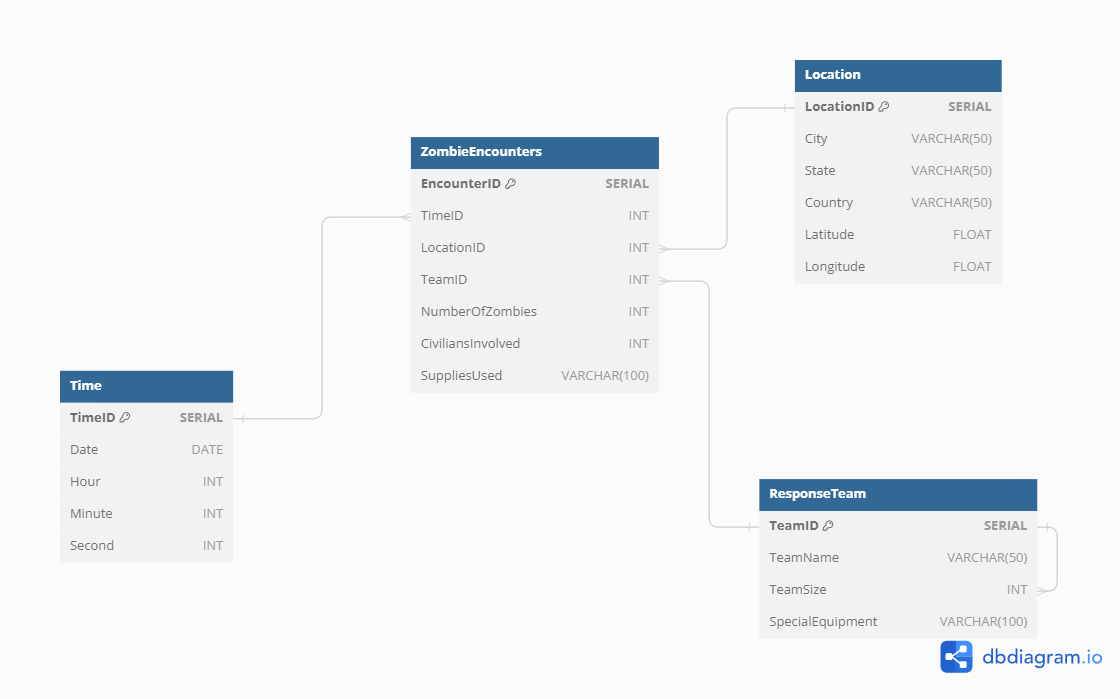

## Questions: Data Warehousing
1. Why do you think organizations use data warehouses instead of just sticking with traditional databases? Discuss the key differences between the two and the advantages of using a data warehouse for analytical tasks.

2. Explain the ETL (Extract, Transform, Load) process in your own words. Why is each step important, and what could go wrong if one of these steps is not performed correctly?

3. The Star Schema is a popular way to structure a data warehouse. Can you think of a real-world scenario, other than the Zombie Outbreak, where a Star Schema would be useful? What would be the fact table, and what would be the dimension tables?

4. Discuss the concept of denormalization in data warehouses. Why might denormalization be beneficial for a data warehouse but not for a transactional database? Can you think of any downsides to denormalization?


5. In our Zombie Outbreak example, the Time table is one of the dimensions. Why do you think time is often included as a dimension in data warehouses? Can you think of any analytical questions that could be answered by including time as a dimension?

## Answers: Data Warehouses
1.

2.

3.

4.

#### STAR in SQL
In the following SQL code, we're creating these tables using the `CREATE TABLE` command. When we specify `PRIMARY KEY`, we're creating a unique identifier for each record in that table. This is like having a unique code for each document in a filing cabinet, making it easier to find later. The `REFERENCES` keyword establishes a link between the central fact table and the dimension tables. This tells the database how these tables are connected, so we can easily pull information from multiple tables when we need to.

By organizing our data this way, the Star Schema makes it easier to perform complex queries and analyses. It allows us to quickly find answers to important questions, like identifying the times and locations with the most zombie activity, or evaluating the effectiveness of different response teams.

In [1]:
# Load Postgres
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%sql postgresql+psycopg2://@/postgres

 * Starting PostgreSQL 14 database server
   ...done.
CREATE ROLE


In [2]:
%%sql
-- Create the Time dimension table
DROP TABLE IF EXISTS Time CASCADE;
CREATE TABLE Time (
    TimeID SERIAL PRIMARY KEY,
    Date DATE,
    Hour INT,
    Minute INT,
    Second INT
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

In [3]:
%%sql
DROP TABLE IF EXISTS Location CASCADE;
-- Create the Location dimension table
CREATE TABLE Location (
    LocationID SERIAL PRIMARY KEY,
    City VARCHAR(50),
    State VARCHAR(50),
    Country VARCHAR(50),
    Latitude FLOAT,
    Longitude FLOAT
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

In [5]:
%%sql
DROP TABLE IF EXISTS ResponseTeam CASCADE;
-- Create the ResponseTeam dimension table
CREATE TABLE ResponseTeam (
    TeamID SERIAL PRIMARY KEY,
    TeamName VARCHAR(50),
    TeamSize INT,
    SpecialEquipment VARCHAR(100)
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

In [6]:
%%sql
DROP TABLE IF EXISTS ZombieEncounters CASCADE;
-- Create the central fact table: ZombieEncounters
CREATE TABLE ZombieEncounters (
    EncounterID SERIAL PRIMARY KEY,
    TimeID INT REFERENCES Time(TimeID),
    LocationID INT REFERENCES Location(LocationID),
    TeamID INT REFERENCES ResponseTeam(TeamID),
    NumberOfZombies INT,
    CiviliansInvolved INT,
    SuppliesUsed VARCHAR(100)
);


 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

### Inserting Sample Zombie Data
Now, let's insert some sample Zombie data, so that we can test out our data warehouse.

In [8]:
%%sql
--Delete existing data
DELETE FROM ZombieEncounters CASCADE;

-- Insert representative data into the Time dimension table
INSERT INTO Time (Date, Hour, Minute, Second) VALUES
('2033-10-31', 14, 30, 0),
('2033-10-31', 15, 45, 15),
('2033-11-01', 10, 5, 30),
('2033-11-01', 12, 15, 0),
('2033-11-01', 16, 20, 45),
('2033-11-02', 9, 30, 15),
('2033-11-02', 11, 45, 0),
('2033-11-02', 14, 10, 30),
('2033-11-03', 8, 25, 45),
('2033-11-03', 19, 50, 0);

-- Insert representative data into the Location dimension table
INSERT INTO Location (City, State, Country, Latitude, Longitude) VALUES
('New York', 'New York', 'USA', 40.7128, -74.0060),
('London', 'England', 'UK', 51.5074, -0.1278),
('Tokyo', 'Tokyo', 'Japan', 35.6895, 139.6917);

-- Insert representative data into the ResponseTeam dimension table
INSERT INTO ResponseTeam (TeamName, TeamSize, SpecialEquipment) VALUES
('Alpha', 5, 'Night Vision'),
('Bravo', 6, 'Flamethrowers'),
('Charlie', 4, 'Drones');

-- Insert representative data into the ZombieEncounters fact table
INSERT INTO ZombieEncounters (TimeID, LocationID, TeamID, NumberOfZombies, CiviliansInvolved, SuppliesUsed) VALUES
(1, 1, 1, 25, 5, 'First Aid Kits'),
(2, 2, 2, 40, 2, 'Ammunition'),
(3, 3, 3, 60, 8, 'Food Supplies'),
(4, 1, 2, 30, 4, 'First Aid Kits'),
(5, 2, 3, 50, 3, 'Ammunition'),
(6, 3, 1, 70, 7, 'Food Supplies'),
(7, 1, 3, 20, 2, 'First Aid Kits'),
(8, 2, 1, 35, 1, 'Ammunition'),
(9, 3, 2, 55, 6, 'Food Supplies'),
(10, 1, 2, 25, 3, 'First Aid Kits');

 * postgresql+psycopg2://@/postgres
0 rows affected.
10 rows affected.
3 rows affected.
3 rows affected.
10 rows affected.


[]

## Exercises

1.  Select All Records from `ZombieEncounters` Table

    -   Hint: Use the `SELECT` statement to retrieve all columns.
2.  Count the Total Number of Zombie Encounters

    -   Hint: Use the `COUNT` function on the `EncounterID` column.
3.  Find the Average Number of Zombies Encountered

    -   Hint: Use the `AVG` function on the `NumberOfZombies` column.
4.  List All Unique Response Teams

    -   Hint: Use the `DISTINCT` keyword on the `TeamID` column in the `ZombieEncounters` table.
5.  Find the Total Number of Civilians Involved in New York

    -   Hint: Use the `SUM` function and a `JOIN` with the `Location` table to filter by city.
6.  Retrieve Encounters that Involved More Than 50 Zombies

    -   Hint: Use the `WHERE` clause to filter records based on the `NumberOfZombies` column.
7.  Find the Earliest and Latest Time of Encounters

    -   Hint: Use the `MIN` and `MAX` functions on the `Date` column in the `Time` table.
8.  List Encounters Sorted by Number of Zombies in Descending Order

    -   Hint: Use the `ORDER BY` clause on the `NumberOfZombies` column.
9.  Find the Total Number of Zombies Encountered by Each Team

    -   Hint: Use the `GROUP BY` clause on the `TeamID` and the `SUM` function on `NumberOfZombies`.
10. Retrieve All Encounters in London on a Specific Date

    -   Hint: Use a `JOIN` with the `Location` and `Time` tables and filter using the `WHERE` clause.
11. Update the `SuppliesUsed` for a Specific Encounter

    -   Hint: Use the `UPDATE` statement and specify the `EncounterID` in the `WHERE` clause.
12. Delete All Encounters Where No Civilians Were Involved

    -   Hint: Use the `DELETE` statement and the `WHERE` clause to filter records where `CiviliansInvolved` is zero.
13. Find the Team that Has Encountered the Most Zombies

    -   Hint: Use `GROUP BY` on `TeamID` and `ORDER BY` on the sum of `NumberOfZombies`.
14. List the Dates When More Than 100 Zombies Were Encountered

    -   Hint: Use `GROUP BY` on the `Date` column in the `Time` table and having a sum of `NumberOfZombies` greater than 100.
15. Find the Average Number of Zombies Encountered in Each Country

    -   Hint: Use `GROUP BY` on the `Country` column in the `Location` table and the `AVG` function on `NumberOfZombies`.